# Logistic Regression & Model Evaluation
Objective: Learn classification, implement Logistic Regression for the Titanic dataset, and understand key evaluation metrics.


## 1. Logistic Regression for Classification

While its name has "regression", Logistic Regression is a **classification** algorithm. It predicts the probability that an input belongs to a certain class.

*   **How it works:** It passes the linear regression output (`w*x + b`) through a **Sigmoid function**, which squashes the value between 0 and 1.
*   **Output:** A probability. If the probability > 0.5, we classify it as class 1, otherwise class 0.

# 🔹 Sigmoid Function

The **Sigmoid function** is a mathematical function used in Logistic Regression and Neural Networks.

It converts any real number into a value between **0 and 1**.

---

## 📌 Formula

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Where:
- \( x \) = input value  
- \( e \) = Euler’s number (≈ 2.718)  
- \( \sigma(x) \) = output value between 0 and 1  

---

## 📊 What It Does

- If input is very large positive → output ≈ 1  
- If input is very large negative → output ≈ 0  
- If input is 0 → output = 0.5  

It creates an **S-shaped curve**.

---

## 🎯 Why Is It Used?

In **Logistic Regression**, the sigmoid function:

- Converts linear output into probability
- Helps in binary classification
- Makes predictions like:
  - If probability ≥ 0.5 → Class 1
  - If probability < 0.5 → Class 0

---

## 🧠 Example

If the model output is:

- \( x = 3 \) → Sigmoid ≈ 0.95 (high probability)
- \( x = -3 \) → Sigmoid ≈ 0.05 (low probability)

---



## ✅ Simple Summary

The Sigmoid function:

> Takes any number and turns it into a probability between 0 and 1.

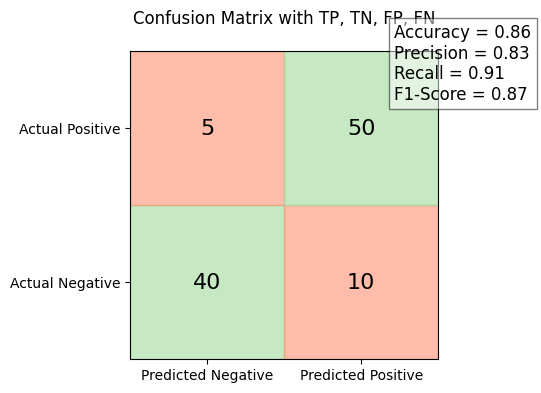

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix values
TP = 50
TN = 40
FP = 10
FN = 5

# Create a figure
fig, ax = plt.subplots(figsize=(8,4))

# Confusion matrix array
matrix = np.array([[TN, FP],
                   [FN, TP]])

# Define colors for each cell: TN, FP, FN, TP
colors = np.array([['#a1d99b', '#fc9272'],   # TN: green, FP: red
                   ['#fc9272', '#a1d99b']]) # FN: red, TP: green

# Draw the colored cells
for i in range(2):
    for j in range(2):
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color=colors[i,j], alpha=0.6))
        ax.text(j, i, f'{matrix[i,j]}', ha='center', va='center', fontsize=16)

# Axis labels
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Predicted Negative', 'Predicted Positive'])
ax.set_yticklabels(['Actual Negative', 'Actual Positive'])

# Draw grid lines
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.grid(False)

# Metrics calculation
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Add metrics as text
metrics_text = f"""Accuracy = {accuracy:.2f}
Precision = {precision:.2f}
Recall = {recall:.2f}
F1-Score = {f1_score:.2f}"""
plt.gcf().text(0.65, 0.95, metrics_text, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.5), ha='left', va='top')

# Title
plt.title('Confusion Matrix with TP, TN, FP, FN', pad=20)
plt.show()



Predicted
               N           P
Actual  N   [TN]        [FP]
        P   [FN]        [TP]

# 📊 Classification Metrics (LaTeX Format)

## Accuracy
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

## Precision
$$
Precision = \frac{TP}{TP + FP}
$$

## Recall (Sensitivity)
$$
Recall = \frac{TP}{TP + FN}
$$

## F1-Score
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

# Classification Metrics Importance

| Metric     | Value  | Meaning                                   | Importance for Accuracy |
|-----------|--------|-------------------------------------------|------------------------|
| **Accuracy**  | 0.857  | Overall correct predictions               | Shows total correctness, but can be misleading if one class is much larger than the other |
| **Precision** | 0.833  | Correctness of positive predictions      | Reduces false alarms (false positives) |
| **Recall**    | 0.909  | Coverage of actual positives             | Reduces missed positive cases (false negatives) |
| **F1-Score**  | 0.869  | Balance between precision and recall     | Useful when classes are imbalanced because it considers both false positives and false negatives |

**Conclusion:**  
- For **overall accuracy**, the model needs a balance between **precision and recall**.  
- **F1-Score** is often the most informative metric when dealing with imbalanced datasets because it considers both precision and recall.  
- Accuracy alone can be misleading if the dataset is heavily imbalanced.

In [2]:
## 3. Hands-On: Titanic Survival Prediction

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Load Data
df = sns.load_dataset('titanic')

print(df.head())

print(df.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

In [3]:
# Fill missing values safely
df['age'] = df['age'].fillna(df['age'].median())

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop unnecessary columns
df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], axis=1, inplace=True)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)


print("\nData after preprocessing:")
print(df.head())


Data after preprocessing:
   survived  pclass   age  sibsp  parch     fare  alone  sex_male  embarked_Q  \
0         0       3  22.0      1      0   7.2500  False      True       False   
1         1       1  38.0      1      0  71.2833  False     False       False   
2         1       3  26.0      0      0   7.9250   True     False       False   
3         1       1  35.0      1      0  53.1000  False     False       False   
4         0       3  35.0      0      0   8.0500   True      True       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [4]:
df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,False,True
889,1,1,26.0,0,0,30.0000,True,True,False,False


In [5]:
# 3. Prepare Data
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Logistic Regression Model
# We add a solver and increase max_iter to ensure convergence
model = LogisticRegression(solver='liblinear', max_iter=1000)


model.fit(X_train, y_train)
print("\nModel training complete.")

# 5. Evaluate the Model
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

print("\nConfusion Matrix:")
print(cm)


Model training complete.
Accuracy:  0.80
Precision: 0.79
Recall:    0.70
F1-Score:  0.74

Confusion Matrix:
[[91 14]
 [22 52]]


Other solvers:

'lbfgs'

'saga'

'newton-cg'

In [6]:
# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



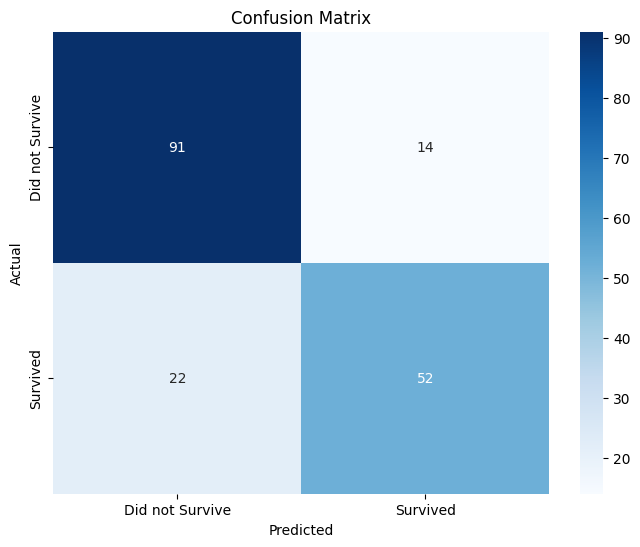

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
import pandas as pd

# Example new passenger
new_passenger = pd.DataFrame({
    'pclass': [3],
    'age': [29],
    'sibsp': [0],
    'parch': [0],
    'fare': [7.25],
    'alone': [1],  
    'sex_male': [1],
    'embarked_Q': [0],
    'embarked_S': [1]
})

print(new_passenger)

   pclass  age  sibsp  parch  fare  alone  sex_male  embarked_Q  embarked_S
0       3   29      0      0  7.25      1         1           0           1


In [9]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [10]:
# Predict survival (0 = Did not survive, 1 = Survived)
prediction = model.predict(new_passenger)
prediction_proba = model.predict_proba(new_passenger)  # Probability for each class

print(f"Predicted Survival: {'Survived' if prediction[0]==1 else 'Did not Survive'}")
print(f"Prediction Probability: {prediction_proba}")

Predicted Survival: Did not Survive
Prediction Probability: [[0.8824112 0.1175888]]
